In [ ]:
import numpy as np
import matplotlib.pyplot as pl

In [ ]:
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1, 1)

In [ ]:
Xtest.shape

(50, 1)

In [ ]:
def kernel(a, b, param):
  sqdist = np.sum(a**2, 1).reshape(-1,1) + np.sum(b**2, 1) - 2*np.dot(a, b.T)
  return np.exp(-.5 * (1/param) * sqdist)

In [ ]:
param = 0.1
K_ss = kernel(Xtest, Xtest, param)

In [ ]:
K_ss.shape

(50, 50)

In [ ]:
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))

In [ ]:
#sample 3 sets of standard normals for our test points
# multipyle them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n, 3)))

In [ ]:
f_prior.shape

(50, 3)

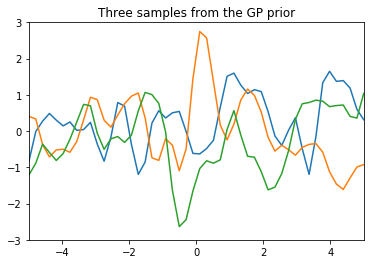

In [ ]:
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

In [ ]:
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

In [ ]:
ytrain

array([[ 0.7568025 ],
       [-0.14112001],
       [-0.90929743],
       [-0.84147098],
       [ 0.84147098]])

In [ ]:
# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

In [ ]:
0.00005*np.eye(len(Xtrain))

array([[5.e-05, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 5.e-05, 0.e+00, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 5.e-05, 0.e+00, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 5.e-05, 0.e+00],
       [0.e+00, 0.e+00, 0.e+00, 0.e+00, 5.e-05]])

In [ ]:
L

array([[1.00002500e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.73777856e-03, 1.00000230e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.06110210e-09, 6.73793148e-03, 1.00000230e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.86244702e-20, 2.06114888e-09, 6.73793149e-03, 1.00000230e+00,
        0.00000000e+00],
       [5.16629148e-55, 1.80484723e-35, 2.86251200e-20, 2.06114888e-09,
        1.00002500e+00]])

In [ ]:
K

array([[1.00000000e+00, 6.73794700e-03, 2.06115362e-09, 2.86251858e-20,
        5.16642063e-55],
       [6.73794700e-03, 1.00000000e+00, 6.73794700e-03, 2.06115362e-09,
        1.80485139e-35],
       [2.06115362e-09, 6.73794700e-03, 1.00000000e+00, 6.73794700e-03,
        2.86251858e-20],
       [2.86251858e-20, 2.06115362e-09, 6.73794700e-03, 1.00000000e+00,
        2.06115362e-09],
       [5.16642063e-55, 1.80485139e-35, 2.86251858e-20, 2.06115362e-09,
        1.00000000e+00]])

In [ ]:
# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

In [ ]:
# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

In [ ]:
mu.shape

(50,)

In [ ]:
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))


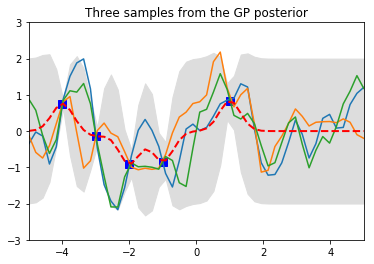

In [ ]:
pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

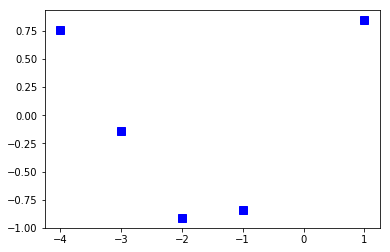

In [ ]:
pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.show()

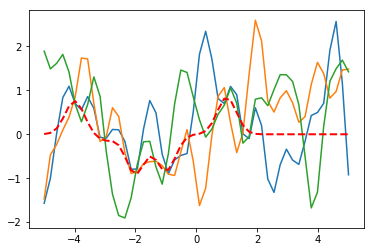

In [ ]:
pl.plot(Xtest, f_post)
pl.plot(Xtest, mu, 'r--', lw=2)
pl.show()

In [ ]:
mu

array([ 5.10540173e-03,  3.19083754e-02,  1.31491504e-01,  3.57274111e-01,
        6.39969745e-01,  7.54976985e-01,  5.82010091e-01,  2.75066805e-01,
        3.09667437e-02, -1.00823960e-01, -1.44679534e-01, -1.55669988e-01,
       -2.48929713e-01, -5.11201872e-01, -8.19888846e-01, -8.96610717e-01,
       -6.91126635e-01, -5.04395528e-01, -5.83624860e-01, -7.94211545e-01,
       -8.10572835e-01, -5.55629336e-01, -2.51731755e-01, -7.50618566e-02,
       -1.28833260e-02,  1.30052570e-02,  7.56102349e-02,  2.53550896e-01,
        5.59440765e-01,  8.13854884e-01,  7.80654580e-01,  4.93730752e-01,
        2.05892619e-01,  5.66122882e-02,  1.02636060e-02,  1.22689832e-03,
        9.67022326e-05,  5.02555192e-06,  1.72206825e-07,  3.89077654e-09,
        5.79617581e-11,  5.69332721e-13,  3.68731357e-15,  1.57461118e-17,
        4.43359403e-20,  8.23109946e-23,  1.00757900e-25,  8.13241811e-29,
        4.32792397e-32,  1.51865415e-35])

In [ ]:
sum(mu)

-1.0843278591975667